In [66]:
import scipy.io.wavfile as wav

In [35]:
rate, data = wav.read('sound_data/A-flute.wav')
trimmed_data = data[:44100]  # Keep first 1 second
wav.write('A-flute_1.wav', 44100, trimmed_data)

In [36]:
rate, data = wav.read('A-flute_1.wav')
print(data.shape)

(44100, 2)


In [37]:
duration_seconds = len(data) / 44100
print(f"Duration: {duration_seconds} seconds")

Duration: 1.0 seconds


## LOOP TO TRIM

In [67]:
import os

folder_path = 'sound_data'
os.makedirs('./trimmed_files')

for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        sample_rate, data = wav.read(file_path)
        trimmed_data = data[:44100]  # Slice the data array to the first second
        trimmed_filename = f"1_{filename}"
        trimmed_file_path = os.path.join('./trimmed_files', trimmed_filename)
        wav.write(trimmed_file_path, sample_rate, trimmed_data)

        print(f"Trimmed {filename} and saved as {trimmed_filename}")

Trimmed A#-Flute.wav and saved as 1_A#-Flute.wav
Trimmed A#-Oboe.wav and saved as 1_A#-Oboe.wav
Trimmed A#-Violin.wav and saved as 1_A#-Violin.wav
Trimmed A#-Violoncello.wav and saved as 1_A#-Violoncello.wav
Trimmed A#.wav and saved as 1_A#.wav
Trimmed A-Flute.wav and saved as 1_A-Flute.wav
Trimmed A-Oboe.wav and saved as 1_A-Oboe.wav
Trimmed A-Violin.wav and saved as 1_A-Violin.wav
Trimmed A-Violoncello.wav and saved as 1_A-Violoncello.wav
Trimmed A.wav and saved as 1_A.wav
Trimmed B-Flute.wav and saved as 1_B-Flute.wav
Trimmed B-Oboe.wav and saved as 1_B-Oboe.wav
Trimmed B-Violin.wav and saved as 1_B-Violin.wav
Trimmed B-Violoncello.wav and saved as 1_B-Violoncello.wav
Trimmed B.wav and saved as 1_B.wav
Trimmed C#-Flute.wav and saved as 1_C#-Flute.wav
Trimmed C#-Oboe.wav and saved as 1_C#-Oboe.wav
Trimmed C#-Violin.wav and saved as 1_C#-Violin.wav
Trimmed C#-Violoncello.wav and saved as 1_C#-Violoncello.wav
Trimmed C#.wav and saved as 1_C#.wav
Trimmed C-Flute.wav and saved as 1_C-Flu

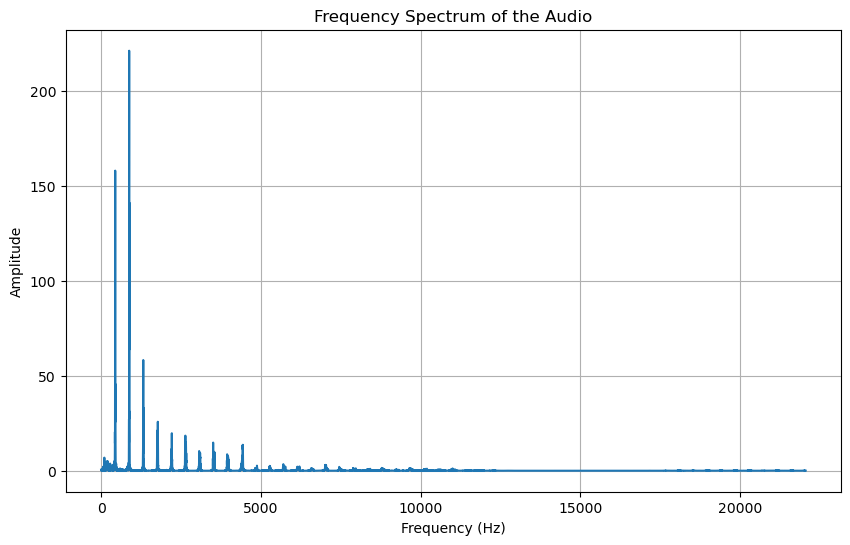

In [96]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate, data = wav.read('trimmed_files/1_A-Violoncello.wav')

# isolate channel 1
data = data[:, 0]

# FFT audio signal (time-domain data)
fft_data = np.fft.fft(data)

# amplitude spectrum (positive values)
amplitude = np.abs(fft_data)

# corresponding frequencies
n = len(data)
frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # Frequency axis

# Plot frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], amplitude[:n // 2])  # Only plot positive frequencies
plt.title('Frequency Spectrum of the Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [97]:
# Step 5: Find the index of the peak frequency (maximum amplitude)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_amplitude = amplitude[:len(amplitude)//2]

peak_index = np.argmax(positive_amplitude)  # Find the index of max amplitude
peak_frequency = positive_frequencies[peak_index]  # Get the corresponding frequency

# Print the peak frequency
print(f"Peak frequency: {peak_frequency} Hz")

Peak frequency: 878.0 Hz


In [149]:
find_peaks(amplitude, height=50,distance=50)

(array([  441,   878,  1319, 42781, 43222, 43659]),
 {'peak_heights': array([158.00149536, 221.14759827,  58.28505707,  58.28505707,
         221.14759827, 158.00149536])})